In [1]:
from pandas import read_csv 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import time, random 
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score  

seed=random.seed(time.time()) 




In [2]:
filename = 'magic04.csv'  

col_names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Lon g','fM3Trans','fAlpha','fDist','class'] 

data = read_csv(filename, names=col_names)  

data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Lon g,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
X = data[data.columns[:-1]] 
Y = data['class']  



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)   



Este es un modelo que no esta basado en distancias entonces el<span style="color:red">   ESCALADO DE DATOS </span> es un paso que nos podemos evitar perfectamente.

Tampoco es necesario una transformacion de variables <span style="color:red">CATEGORICAS</span> a <span style="color:red">NUMERICAS. </span> En **ESCALER** si es necesario pero aqui no hace falta porque requiere variables numericas

Entonces vamos directamente a generar el objeto de la clase DesicionTree.

Este modelo ya corre con el <span style="color:red">INDICE DE GINNI</span>, el criterio para elegir por defecto la pureza o impureza de las particiones generadas(La homogeneidad)

Sin embargo el criterio tambien puede ser <span style="color:red"> ENTROPIA </span>

Entre menor sea este indice menor porque más homogeneo será el grupo que genere esa partición.

In [5]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train) 

Una vez generado el arbol solo tenemos que hacer el predict con los patrones de test y ver la metrica de rendimiento.

In [6]:
y_pred = model.predict(X_test)  

In [8]:
bacc =  balanced_accuracy_score(y_pred, y_test) 
acc =  accuracy_score(y_pred, y_test) 
cm =  confusion_matrix(y_pred, y_test)  


Una vez el arbol entrenado tien la posibilidad de ser visualizado con PLOT

[Text(0.48660714285714285, 0.9166666666666666, 'X[8] <= 25.484\ngini = 0.456\nsamples = 13314\nvalue = [8625, 4689]'),
 Text(0.2544642857142857, 0.75, 'X[0] <= 114.613\ngini = 0.297\nsamples = 7867\nvalue = [6441, 1426]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[8] <= 11.883\ngini = 0.255\nsamples = 7489\nvalue = [6367, 1122]'),
 Text(0.07142857142857142, 0.4166666666666667, 'X[6] <= -71.982\ngini = 0.172\nsamples = 5252\nvalue = [4752, 500]'),
 Text(0.03571428571428571, 0.25, 'X[1] <= 39.593\ngini = 0.44\nsamples = 52\nvalue = [17, 35]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.495\nsamples = 29\nvalue = [16, 13]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.10714285714285714, 0.25, 'X[4] <= 0.232\ngini = 0.163\nsamples = 5200\nvalue = [4735, 465]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.11\nsamples = 3971\nvalue = [3739, 232]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.307

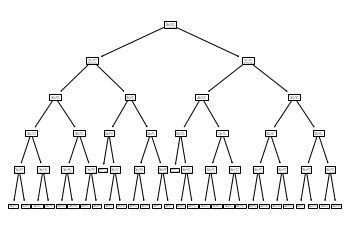

In [9]:
plot_tree(model)

In [10]:
print(bacc, acc) 
print(cm) 

0.8167198110391464 0.8240448650543287
[[3373  670]
 [ 334 1329]]


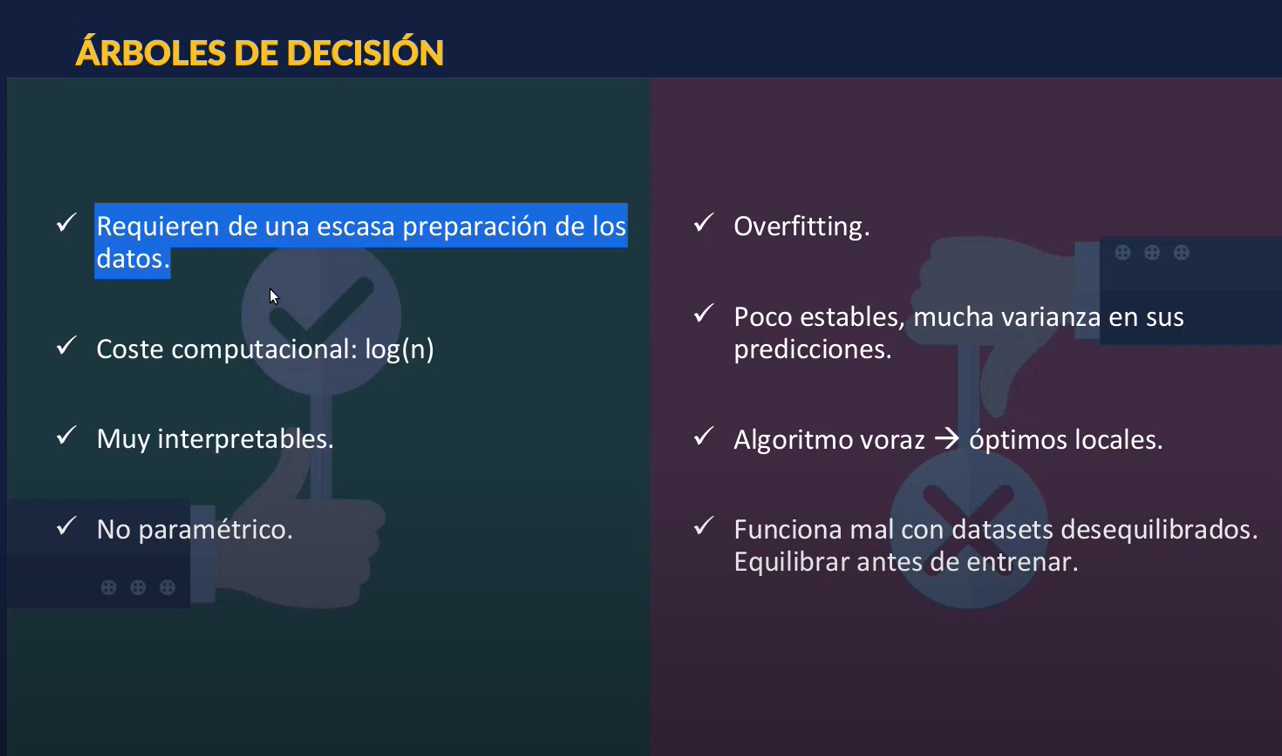

In [11]:
from IPython.display import Image
Image(filename='img/12.PNG') 

**DESEQUILIBRIO**

Como funciona mal con datasets desequilibrados. Enotnces para arregalr esto hay dos maneras.

Por un lado hay un parametro **Class_weight** que se pone en **TRUE** al trabajar con este tipo de dataset.

Tambien se puede equilibrar el dataset antes de comenzar con la costruccion del modelo.

**OVERFITING** como se puede paliar:

    - Pre-prunig
    - Post-pruning

**VARIANZA** como se puede mitigar.

Metiendo los arboles de desicion dentro de modelos de **ENSAMBLE**



**VORAZ** dirigido a optimos locales, como se resulve:
    
    - Multistarting
    - Suministrar varios arboles de desicion y despues sacar una media.

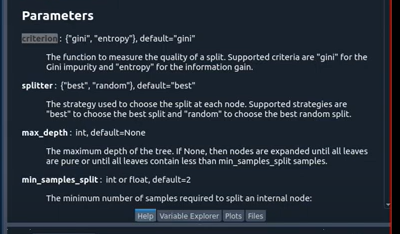

In [1]:
from IPython.display import Image
Image(filename='img/13.PNG') 

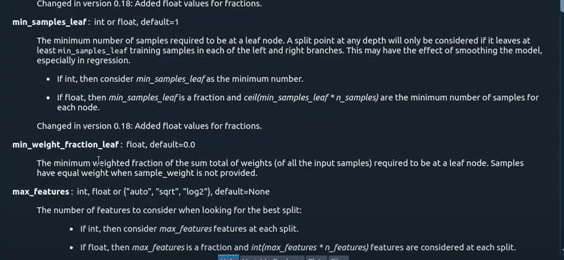

In [2]:
from IPython.display import Image
Image(filename='img/14.PNG') 

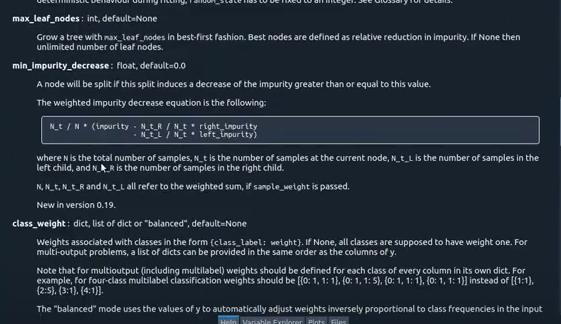

In [3]:
from IPython.display import Image
Image(filename='img/15.PNG') 

Esto es para post pruning

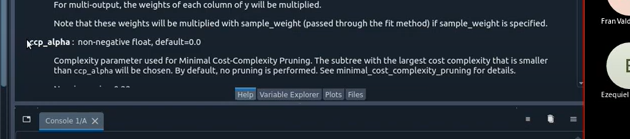

In [5]:
from IPython.display import Image
Image(filename='img/16.PNG') 